<a href="https://colab.research.google.com/github/sbeldine97/Business-Analytics-Report/blob/main/Customer_Offer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the necessary libraries

import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from google.colab import drive
custom_colors = ['#512455', '#FC6700', '#00A1B1', '#939199', '#843A1A']


In [ ]:
# Mounting Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Formation

## Loading and reading the relevant datasets

In [ ]:
#Loading the transactions dataset

file_path = '/content/drive/MyDrive/Business Analytics Report/transcript.json'

# Initializing an empty list to store individual JSON objects
json_objects = []

# Reading the JSON file line by line and load each line as a JSON object
with open(file_path, 'r') as json_file:
    for line in json_file:
        try:
            json_data = json.loads(line)
            json_objects.append(json_data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

# Converting the list of JSON objects into a DataFrame
transaction= pd.DataFrame(json_objects)


In [ ]:
#Portfolio dataset
file_path = '/content/drive/MyDrive/Business Analytics Report/portfolio.json'
# Initializing an empty list to store individual JSON objects
json_objects = []
# Reading the JSON file line by line and load each line as a JSON object
with open(file_path, 'r') as json_file:
    for line in json_file:
        try:
            json_data = json.loads(line)
            json_objects.append(json_data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

# Converting the list of JSON objects into a DataFrame
portfolio = pd.DataFrame(json_objects)


In [ ]:
file_path = '/content/drive/MyDrive/Business Analytics Report/profile.json'
# Initializing an empty list to store individual JSON objects
json_objects = []
# Reading the JSON file line by line and load each line as a JSON object
with open(file_path, 'r') as json_file:
    for line in json_file:
        try:
            json_data = json.loads(line)
            json_objects.append(json_data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

# Converting the list of JSON objects into a DataFrame
profile = pd.DataFrame(json_objects)


## Functions

In [ ]:
def plot_histogram(data, column, ax, binsize=50, y_label='', x_label='', color='green'):
    """
    Function to plot standard histograms (Can be used for individual or side by side plots)
    """
    # Plots the Graph with title & axis
    sns.distplot(data[column], kde=False, color=color, bins=binsize, ax=ax)

    # Sets up the title based the column
    ax.set_title(f"Spread of {column}", fontsize=25)

    # Sets the y and x labels
    ax.set_ylabel(y_label, fontsize=24)
    ax.set_xlabel(x_label, fontsize=24)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)

    # Removes spines and changes layout to tight
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

def plot_line(data, ax, color, alpha=.7, ls='-', lw=5, label=None):
    """
    plots the standard line graph
    """
    ax.plot(data, color=color,
            alpha=alpha, ls=ls,
            linewidth=lw, label=label)

## Understanding the data

### Portfolio Data

In [ ]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7.0,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5.0,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4.0,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10.0,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [ ]:
#Checking the shape of the portfolio data
portfolio.shape


(10, 6)

In [ ]:
# look into the types of offers available
portfolio['offer_type'].unique()

array(['bogo', 'informational', 'discount'], dtype=object)

In [ ]:
#Looking into the spread of the numerical data

portfolio.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


In [ ]:
#Channels that the campaigns were displayed on
portfolio.channels

0         [email, mobile, social]
1    [web, email, mobile, social]
2            [web, email, mobile]
3            [web, email, mobile]
4                    [web, email]
5    [web, email, mobile, social]
6    [web, email, mobile, social]
7         [email, mobile, social]
8    [web, email, mobile, social]
9            [web, email, mobile]
Name: channels, dtype: object

Based on the preceding analysis, it becomes evident that a total of 10 distinct campaigns were executed, incorporating three diverse types of offers: BOGO (Buy One Get One Free), informational promotions, and discounts. These campaigns were strategically disseminated across various channels, including the web, email, mobile platforms, and social media. The duration of these campaigns varied, spanning from 3 to 10 days. Notably, the campaigns exhibited an average level of difficulty, measured by the minimum spend required, at 8.5 dollars, while offering an average reward of 4 dollars



### Profile data

In [ ]:
profile.head()

,age,member joined,gender,person,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [ ]:
profile.dtypes

age               object
member joined      int64
gender            object
person            object
income           float64
dtype: object

In [ ]:
profile.shape

(17000, 5)

In [ ]:
# check the spread of dates from when users became a member
pd.to_datetime(profile['became_member_on']).describe()

<ipython-input-313-4e2f1cf774b9>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  pd.to_datetime(profile['became_member_on']).describe()


count                   17000
unique                   1716
top       2017-12-07 00:00:00
freq                       43
first     2013-07-29 00:00:00
last      2018-07-26 00:00:00
Name: became_member_on, dtype: object

In [ ]:
print('Overall event count:')
print(transaction.event.value_counts())


Overall event count:
transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64


In [ ]:
#Checking the income and age spread
profile.describe()

,age,income
count,17000.000000,14825.000000
mean,62.531412,65404.991568
std,26.738580,21598.299410
min,18.000000,30000.000000
25%,45.000000,49000.000000
50%,58.000000,64000.000000
75%,73.000000,80000.000000
max,118.000000,120000.000000


In [ ]:
# Checking the spread of data in the gender column
profile.groupby('gender').count()

,age,id,became_member_on,income
gender,,,,
F,6129,6129,6129,6129
M,8484,8484,8484,8484
O,212,212,212,212


In [ ]:
#Checking for missing values in the income column
profile['income'].isna().sum()

2175

<ipython-input-318-aca5efb9fba4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(profile['age'], bins=25, kde=False, ax=ax[0], color=custom_colors[0])
<ipython-input-318-aca5efb9fba4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(profile['income'], bins=25, kde=False, ax=ax[1], color=custom_

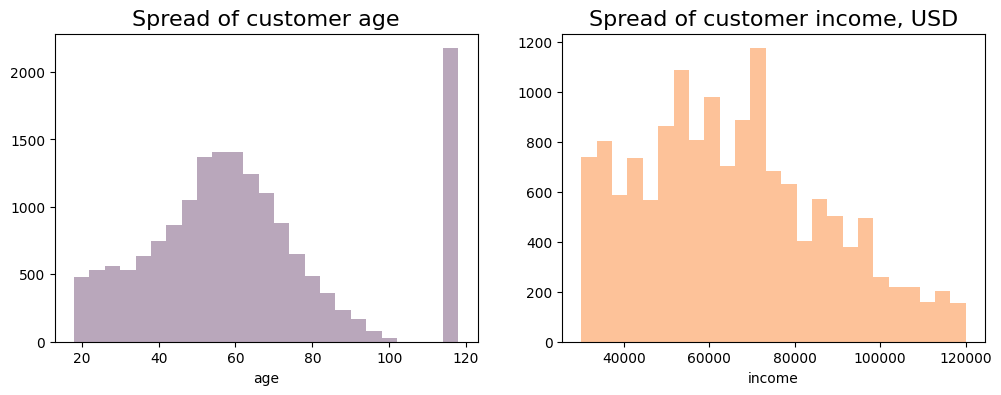

In [ ]:
# Visualizing the age and income spread
fig, ax = plt.subplots(1,2, figsize = (12, 4))

sns.distplot(profile['age'], bins=25, kde=False, ax=ax[0], color=custom_colors[0])
sns.distplot(profile['income'], bins=25, kde=False, ax=ax[1], color=custom_colors[1])

ax[0].set_title('Spread of customer age', fontsize=16)
ax[1].set_title('Spread of customer income, USD', fontsize=16)

fig.show()

From the profile data, we observe 17,000 consumers joined between July 29, 2013, and July 26, 2018, with approximately 6,100 females, 8,400 males, and 200 with unknown gender. About 15,000 users fall within the $30,000 to $120,000 income range, averaging $64,000. The age range is 18 to over 73, but some entries set the age at 118, possibly reflecting cautious users. To enhance analysis accuracy, it is suggested to exclude or address these entries by either removing them, treating them separately, or substituting a dummy value like the average age.

### Transcript Data






In [ ]:
transaction.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [ ]:
transaction.shape

(306534, 4)

In [ ]:
transaction.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [ ]:
#Checking the people that received offers and those that did not
transaction.groupby('event').count()

,person,value,time
event,,,
offer completed,33579,33579,33579
offer received,76277,76277,76277
offer viewed,57725,57725,57725
transaction,138953,138953,138953


In [ ]:
# Checking foe number of unique users in the dataset
len(transaction['person'].unique())

17000

In [ ]:
#Looking at the values column
transaction_copy = transaction
transaction_copy['type'] = [list(x.keys())[0] for x in transaction['value']]
transaction_copy['campaign'] = [list(x.values())[0] for x in transaction['value']]
transaction_copy.groupby('type').count()


,person,event,value,time,campaign
type,,,,,
amount,138953,138953,138953,138953,138953
offer id,134002,134002,134002,134002,134002
offer_id,33579,33579,33579,33579,33579


Analyzing the transcript data reveals that the company has logged a total of 306,534 events, primarily comprised of 138,953 transactions, 76,277 received offers, 57,725 viewed offers, and 33,579 completed offers. The time column spans from zero to 714 minutes, representing the observation period, with a maximum duration of around 30 days, aligning with expectations.
Further, the dataset encompasses all 17,000 users from the profile data. The value column within the dataset contains either the campaign IDs or the amounts spent on the processed transactions.

# Data Cleaning


In [ ]:
def clean_transaction_data(data):
    """
    this process cleans the values column and formats the transcript data
    """
    # creates a column for the type of interaction
    data['interaction_value'] = [list(x.keys())[0] for x in data['value']]

    # creates a column related to the value amount or id
    data['id'] = [list(x.values())[0] for x in data['value']]

    # drops the value column
    data = data.drop(columns=['value'])

    # cleans the interaction type column so offer id is consistent
    data['interaction_value'] = [x.replace('offer id','offer_id') for x in data['interaction_value']]

    # split out interaction_type
    temp_df = pd.get_dummies(data['interaction_value'])

    # combine the dataframes
    data = pd.concat([temp_df, data], axis=1, sort=True)

    # split out event
    temp_df = pd.get_dummies(data['event'])

    # combine the dataframes
    data = pd.concat([temp_df, data], axis=1, sort=True)

    # drop the original columns
    data = data.drop(columns=['interaction_value','event'])

    return data # returns the clean transcript data

In [ ]:
def clean_profile_data(data):
    """
    this process clean age, income and became_member_on columns in the profile data
    """
    # rename the column 'id' to person
    data.columns = ['age','became_member_on','gender','person' ,'income']

    # replace 118 in the age column with a zero indicating no age
    # keeping these users as a seperate group is important as they may show different user behaviour
    data['age'] = data['age'].replace(118,0)



    # replace the NaN's in the income
    data['income'] = data['income'].fillna(0)

    # replace M, F, O and None types to get the 4 groups of customers
    data['gender'] = data['gender'].replace('M','male')
    data['gender'] = data['gender'].replace('F','female')
    data['gender'] = data['gender'].replace('O','other')
    data['gender'] = data['gender'].fillna('unknown gender')

    # split the column into seperate columns
    temp_df = pd.get_dummies(data['gender'])

    # combine the dataframes
    data = pd.concat([temp_df, data], axis=1, sort=True)

    # drop the original column
    data = data.drop(columns=['gender'])

    return data

In [ ]:
def clean_portfolio_data(data):
    """
    this process has been created to clean columns in the profile data
    """
    # splits the channels column into seperate columns
    # creates temporary dataframes and lists
    temp_df = pd.DataFrame(columns=['web', 'email', 'mobile','social'])
    temp_list = []

    # loop through the rows and attach the values to a dic
    for index, row in data.iterrows():
        for value in row['channels']:
             temp_list.append({'index': index, 'value':value})

    # change the list into dataframe
    temp_df = temp_df.append(temp_list, ignore_index=False, sort=True)
    temp_df = temp_df.groupby('index')['value'].value_counts()
    temp_df = temp_df.unstack(level=-1).fillna(0)

    # combine the dataframes
    data = pd.concat([temp_df, data], axis=1, sort=True)

    # split the column into seperate columns
    temp_df = pd.get_dummies(data['offer_type'])

    # combine the dataframes
    data = pd.concat([temp_df, data], axis=1, sort=True)

    # drop the original columns
    data = data.drop(columns=['offer_type','channels'])

    return data

In [ ]:
# run the initial cleaning on each dataset
clean_portfolio = clean_portfolio_data(portfolio)
clean_portfolio

<ipython-input-327-179c2deb1faa>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = temp_df.append(temp_list, ignore_index=False, sort=True)


,bogo,discount,informational,email,mobile,social,web,reward,difficulty,duration,id
0.0,1,0,0,1.0,1.0,1.0,0.0,10,10,7.0,ae264e3637204a6fb9bb56bc8210ddfd
1.0,1,0,0,1.0,1.0,1.0,1.0,10,10,5.0,4d5c57ea9a6940dd891ad53e9dbe8da0
2.0,0,0,1,1.0,1.0,0.0,1.0,0,0,4.0,3f207df678b143eea3cee63160fa8bed
3.0,1,0,0,1.0,1.0,0.0,1.0,5,5,7.0,9b98b8c7a33c4b65b9aebfe6a799e6d9
4.0,0,1,0,1.0,0.0,0.0,1.0,5,20,10.0,0b1e1539f2cc45b7b9fa7c272da2e1d7
5.0,0,1,0,1.0,1.0,1.0,1.0,3,7,7.0,2298d6c36e964ae4a3e7e9706d1fb8c2
6.0,0,1,0,1.0,1.0,1.0,1.0,2,10,10.0,fafdcd668e3743c1bb461111dcafc2a4
7.0,0,0,1,1.0,1.0,1.0,0.0,0,0,3.0,5a8bc65990b245e5a138643cd4eb9837
8.0,1,0,0,1.0,1.0,1.0,1.0,5,5,5.0,f19421c1d4aa40978ebb69ca19b0e20d
9.0,0,1,0,1.0,1.0,0.0,1.0,2,10,7.0,2906b810c7d4411798c6938adc9daaa5


In [ ]:
clean_trans_df = clean_transaction_data(transaction_copy)
clean_trans_df.head()

,offer completed,offer received,offer viewed,transaction,amount,offer_id,person,time,type,campaign,id
0,0,1,0,0,0,1,78afa995795e4d85b5d9ceeca43f5fef,0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,0,1,0,0,0,1,a03223e636434f42ac4c3df47e8bac43,0,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,0,1,0,0,0,1,e2127556f4f64592b11af22de27a7932,0,offer id,2906b810c7d4411798c6938adc9daaa5,2906b810c7d4411798c6938adc9daaa5
3,0,1,0,0,0,1,8ec6ce2a7e7949b1bf142def7d0e0586,0,offer id,fafdcd668e3743c1bb461111dcafc2a4,fafdcd668e3743c1bb461111dcafc2a4
4,0,1,0,0,0,1,68617ca6246f4fbc85e91a2a49552598,0,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0,4d5c57ea9a6940dd891ad53e9dbe8da0
